## Data visualization

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('retail_store_sales_cleaned_feature_engineering.csv')
df.head()

Transaction ID Customer ID                            Category         Item  \
0    TXN_6950467     CUST_01  Computers and electric accessories   Item_6_CEA   
1    TXN_9662767     CUST_01                           Beverages  Item_20_BEV   
2    TXN_5044628     CUST_01                            Butchers  Item_25_BUT   
3    TXN_9131959     CUST_01                       Milk Products  Item_2_MILK   
4    TXN_9753172     CUST_01  Computers and electric accessories   Item_9_CEA   

   Price Per Unit  Quantity  Total Spent Transaction Date  Year  Month  ...  \
0            12.5       6.0         75.0       2022-01-01  2022      1  ...   
1            33.5       9.0        301.5       2022-01-02  2022      1  ...   
2            41.0       9.0        369.0       2022-01-07  2022      1  ...   
3             6.5       1.0          6.5       2022-01-11  2022      1  ...   
4            17.0       9.0        153.0       2022-01-12  2022      1  ...   

   Is_Weekend  Is_Holiday  Is_NonWorkday  Prev_Date_Cust Recency_Cust  \
0        True        True           True             NaN            0   
1        True       False           True      2022-01-01            1   
2       False       False          False      2022-01-02            5   
3       False       False          False      2022-01-07            4   
4       False       False          False      2022-01-11            1   

   PM_Credit Card  PM_Digital Wallet  Loc_Online  Disc_True  Disc_Unknown  
0               0                  1           0          1             0  
1               1                  0           0          1             0  
2               0                  1           0          0             1  
3               1                  0           1          0             0  
4               0                  1           0          1             0  

[5 rows x 21 columns]

In [25]:
def restore_discount(row):
    if row['Disc_True'] == 1:
        return 'True'
    elif row['Disc_Unknown'] == 1:
        return 'Unknown'
    else:
        return 'False' 

df['Has_Discount'] = df.apply(restore_discount, axis=1)
def get_day_type(row):
    if row['Is_Holiday'] == True:
        return 'Holiday'
    elif row['Is_NonWorkday'] == True:
        return 'NonWorkday'
    elif row['Is_Weekend'] == True:
        return 'Weekend'
    else:
        return 'Weekday'

df['DayType'] = df.apply(get_day_type, axis=1)

def get_payment_method(row):
    if row['PM_Credit Card'] == True:
        return 'Credit Card'
    elif row['PM_Digital Wallet'] == True:
        return 'Digital Wallet'
    else:
        return 'Cash'

df['PaymentMethod'] = df.apply(get_payment_method, axis=1)



In [26]:
df = df.drop(columns=['Disc_True', 'Disc_Unknown'])

In [27]:
df

Transaction ID Customer ID                            Category  \
0        TXN_6950467     CUST_01  Computers and electric accessories   
1        TXN_9662767     CUST_01                           Beverages   
2        TXN_5044628     CUST_01                            Butchers   
3        TXN_9131959     CUST_01                       Milk Products   
4        TXN_9753172     CUST_01  Computers and electric accessories   
...              ...         ...                                 ...   
12570    TXN_8216096     CUST_25       Electric household essentials   
12571    TXN_6314774     CUST_25                       Milk Products   
12572    TXN_4454614     CUST_25                          Patisserie   
12573    TXN_2596812     CUST_25                          Patisserie   
12574    TXN_5907338     CUST_25                           Beverages   

               Item  Price Per Unit  Quantity  Total Spent Transaction Date  \
0        Item_6_CEA            12.5       6.0         75.0       2022-01-01   
1       Item_20_BEV            33.5       9.0        301.5       2022-01-02   
2       Item_25_BUT            41.0       9.0        369.0       2022-01-07   
3       Item_2_MILK             6.5       1.0          6.5       2022-01-11   
4        Item_9_CEA            17.0       9.0        153.0       2022-01-12   
...             ...             ...       ...          ...              ...   
12570   Item_21_EHE            35.0       1.0         35.0       2025-01-06   
12571  Item_23_MILK            38.0       8.0        304.0       2025-01-08   
12572   Item_10_PAT            18.5       1.0         18.5       2025-01-13   
12573    Item_2_PAT             6.5       8.0         52.0       2025-01-17   
12574   Item_23_BEV            38.0       9.0        342.0       2025-01-18   

       Year  Month  ...  Is_Holiday  Is_NonWorkday  Prev_Date_Cust  \
0      2022      1  ...        True           True             NaN   
1      2022      1  ...       False           True      2022-01-01   
2      2022      1  ...       False          False      2022-01-02   
3      2022      1  ...       False          False      2022-01-07   
4      2022      1  ...       False          False      2022-01-11   
...     ...    ...  ...         ...            ...             ...   
12570  2025      1  ...       False          False      2025-01-04   
12571  2025      1  ...       False          False      2025-01-06   
12572  2025      1  ...       False          False      2025-01-08   
12573  2025      1  ...       False          False      2025-01-13   
12574  2025      1  ...       False           True      2025-01-17   

       Recency_Cust PM_Credit Card  PM_Digital Wallet  Loc_Online  \
0                 0              0                  1           0   
1                 1              1                  0           0   
2                 5              0                  1           0   
3                 4              1                  0           1   
4                 1              0                  1           0   
...             ...            ...                ...         ...   
12570             2              0                  0           0   
12571             2              1                  0           1   
12572             5              1                  0           0   
12573             4              0                  0           1   
12574             1              0                  0           0   

       Has_Discount     DayType   PaymentMethod  
0              True     Holiday  Digital Wallet  
1              True  NonWorkday     Credit Card  
2           Unknown     Weekday  Digital Wallet  
3             False     Weekday     Credit Card  
4              True     Weekday  Digital Wallet  
...             ...         ...             ...  
12570         False     Weekday            Cash  
12571       Unknown     Weekday     Credit Card  
12572          True     Weekday     Credit Card  
12573       Unknown   

----


### 數值類型視覺化

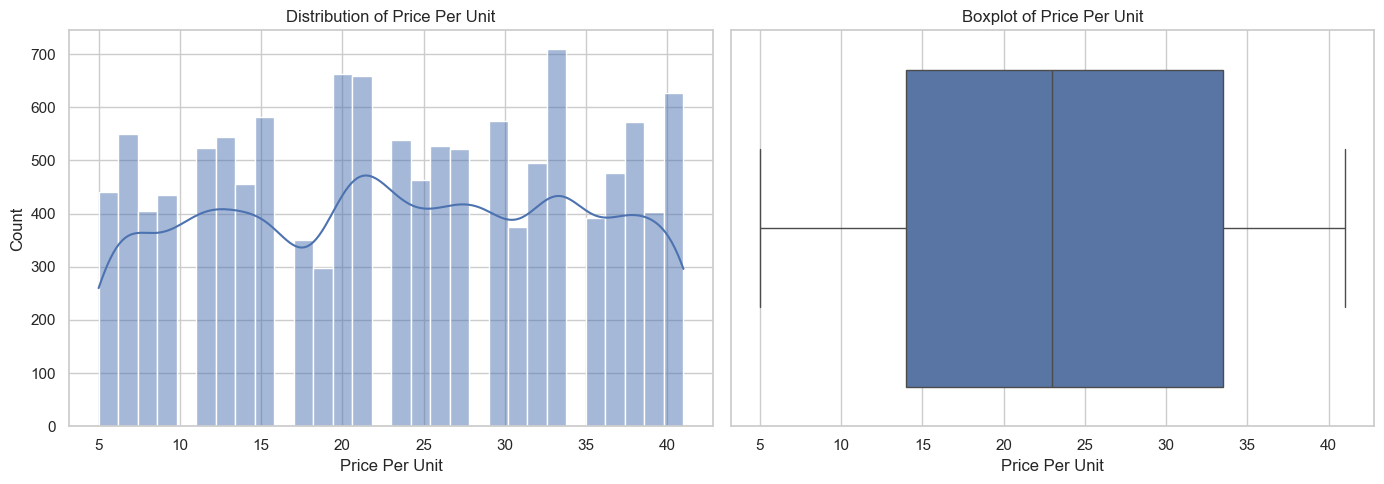

📊 Descriptive stats for: Price Per Unit
count    12575.000000
mean        23.369304
std         10.748728
min          5.000000
25%         14.000000
50%         23.000000
75%         33.500000
max         41.000000
Name: Price Per Unit, dtype: float64
Skewness: -0.03
Kurtosis: -1.17


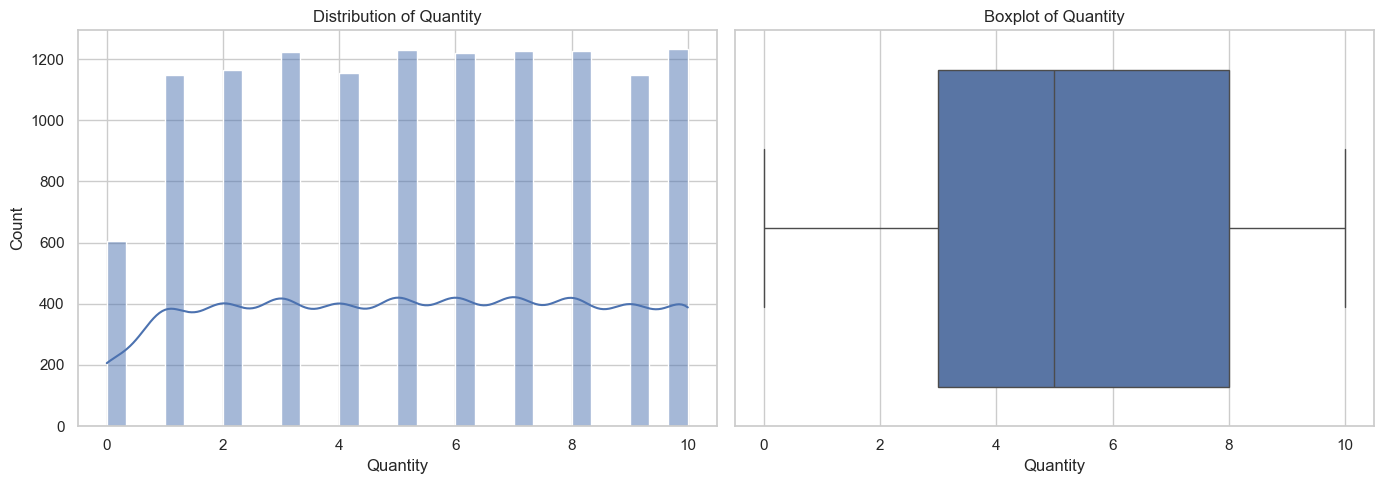

📊 Descriptive stats for: Quantity
count    12575.000000
mean         5.270457
std          3.029325
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Quantity, dtype: float64
Skewness: -0.04
Kurtosis: -1.17


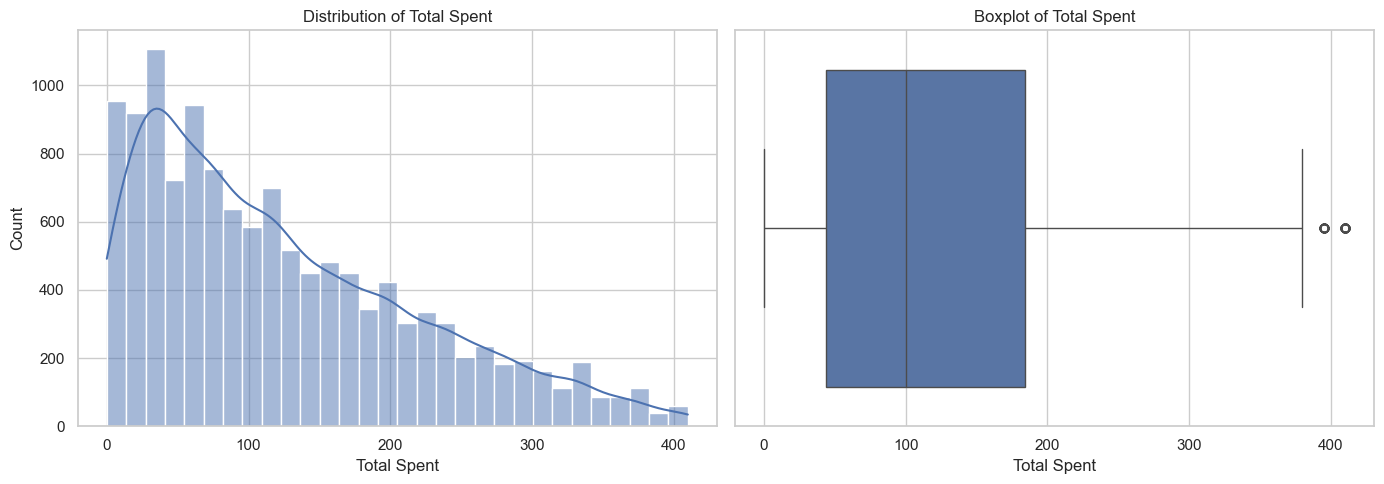

📊 Descriptive stats for: Total Spent
count    12575.000000
mean       123.425129
std         96.514921
min          0.000000
25%         43.500000
50%        100.000000
75%        184.000000
max        410.000000
Name: Total Spent, dtype: float64
Skewness: 0.83
Kurtosis: -0.10


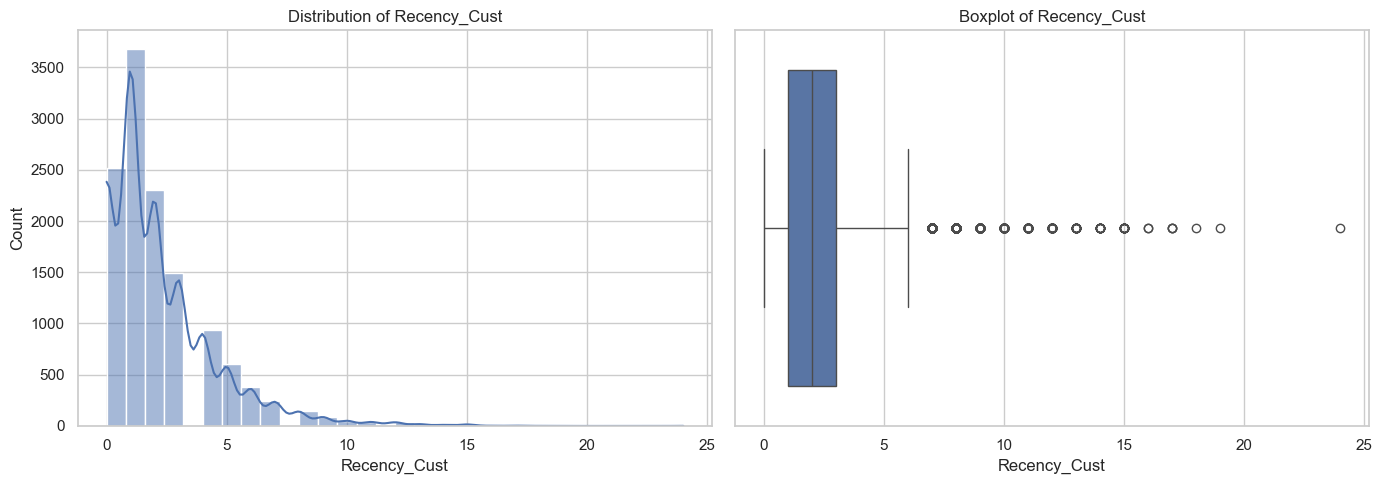

📊 Descriptive stats for: Recency_Cust
count    12575.000000
mean         2.205726
std          2.274938
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: Recency_Cust, dtype: float64
Skewness: 1.95
Kurtosis: 5.78


In [28]:
sns.set(style="whitegrid")

# 數值欄位列表
numeric_cols = ['Price Per Unit', 'Quantity', 'Total Spent', 'Recency_Cust']

for col in numeric_cols:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

    print(f"📊 Descriptive stats for: {col}")
    print(df[col].describe())
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurt():.2f}")
    print("="*50)


### ① **Price Per Unit（單位價格）**

* 📊 分佈：整體呈現比較平坦的多峰分布，價格分布廣泛，從 5 到 41。
* 📦 Boxplot：大致對稱，沒有明顯離群點。
* 📈 描述統計：

  * 平均值 ≈ 23.4，標準差 ≈ 10.7
  * 偏態（Skewness）≈ -0.03 → 接近對稱
  * 峰度（Kurtosis）≈ -1.17 → 分布較扁平

**🔍 推論：**

* 價格分佈是均勻且多樣的，商品種類可能非常多樣。
* 沒有特別集中於某個價格點，也幾乎沒有極端價格。
* 適合用來分析「價格區間與購買行為」之間的關聯。

---

### ② **Quantity（購買數量）**

* 📊 分佈：偏向高頻購買少量（如 1～5），0 和 10 兩端略為突出。
* 📦 Boxplot：整體集中，無離群值。
* 📈 描述統計：

  * 平均 ≈ 5.27，標準差 ≈ 3.03
  * 偏態 ≈ -0.04（近似對稱）
  * 峰度 ≈ -1.17 → 也比較扁平

**🔍 推論：**

* 顧客常見的購買數量為 5 件左右。
* 數量分布比較「規律」且偏離不大，顧客行為相對一致。
* 可以做類似：數量 vs 折扣/價格 的分析，是否大宗會有價格優惠。

---

### ③ **Total Spent（總消費金額）**

* 📊 分佈：偏態明顯（右偏），多數集中在 100 以下，但存在不少高金額消費。
* 📦 Boxplot：右尾長，有明顯離群值。
* 📈 描述統計：

  * 平均 ≈ 123.4，但中位數 ≈ 100 → 右偏
  * 偏態 ≈ 0.83（正偏）
  * 峰度 ≈ -0.10（接近平坦）

**🔍 推論：**

* 少數高消費金額拉高了整體平均。
* 分析時應使用中位數輔助判斷（而非只看平均）。
* 可針對離群顧客做分群分析（例如 VIP 客群）。

---

### ④ **Recency\_Cust（顧客回購天數）**

* 📊 分佈：極度偏左，大部分顧客在 0～3 天內又來購買。
* 📦 Boxplot：分佈非常緊湊，有明顯右尾離群點。
* 📈 描述統計：

  * 平均 ≈ 2.2 天，偏態 ≈ 1.95（強烈正偏）
  * 峰度 ≈ 5.78 → 尖峰型分布

**🔍 推論：**

* 多數顧客是**高頻回購**，顯示出良好的顧客黏性。
* 有少數回購間隔時間長的顧客，可作為流失預警指標。
* 適合導入 RFM 模型來做顧客分群（Recency 是 RFM 的一環）。

---


### 產品分析

📌 商品類別分佈（交易數量）：
Category
Furniture                             1591
Electric household essentials         1591
Food                                  1588
Milk Products                         1584
Butchers                              1568
Beverages                             1567
Computers and electric accessories    1558
Patisserie                            1528
Name: count, dtype: int64


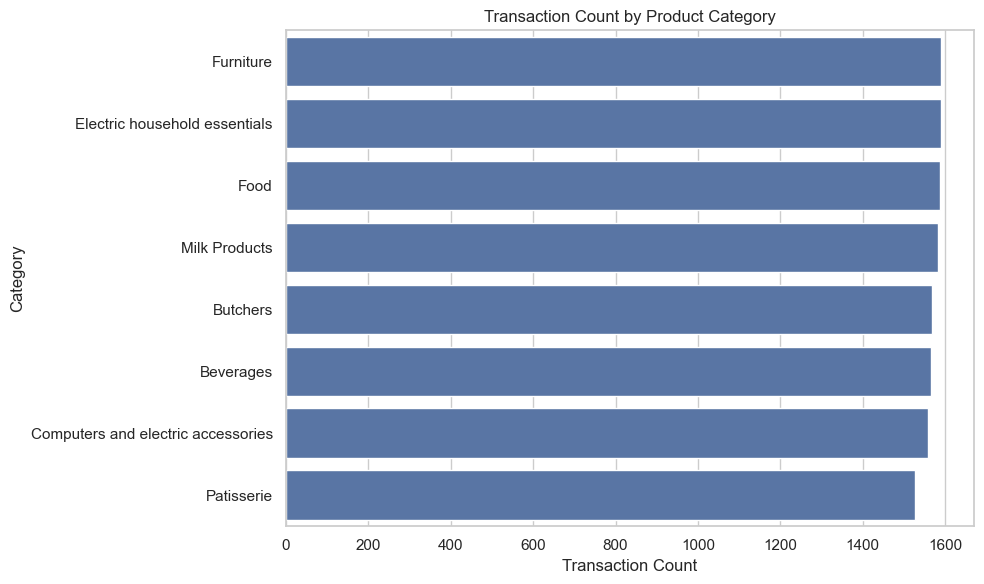


📌 熱銷商品 Top 20（依交易次數）：
Item
Item_2_BEV      132
Item_19_CEA     124
Item_16_MILK    124
Item_19_MILK    121
Item_25_FUR     121
Item_11_FUR     120
Item_14_FOOD    118
Item_1_MILK     118
Item_11_MILK    117
Item_24_FUR     116
Item_5_FUR      115
Item_12_CEA     114
Item_25_EHE     113
Item_20_BUT     113
Item_14_BEV     113
Item_8_EHE      113
Item_22_BUT     113
Item_13_FOOD    113
Item_5_FOOD     110
Item_23_BUT     109
Name: count, dtype: int64


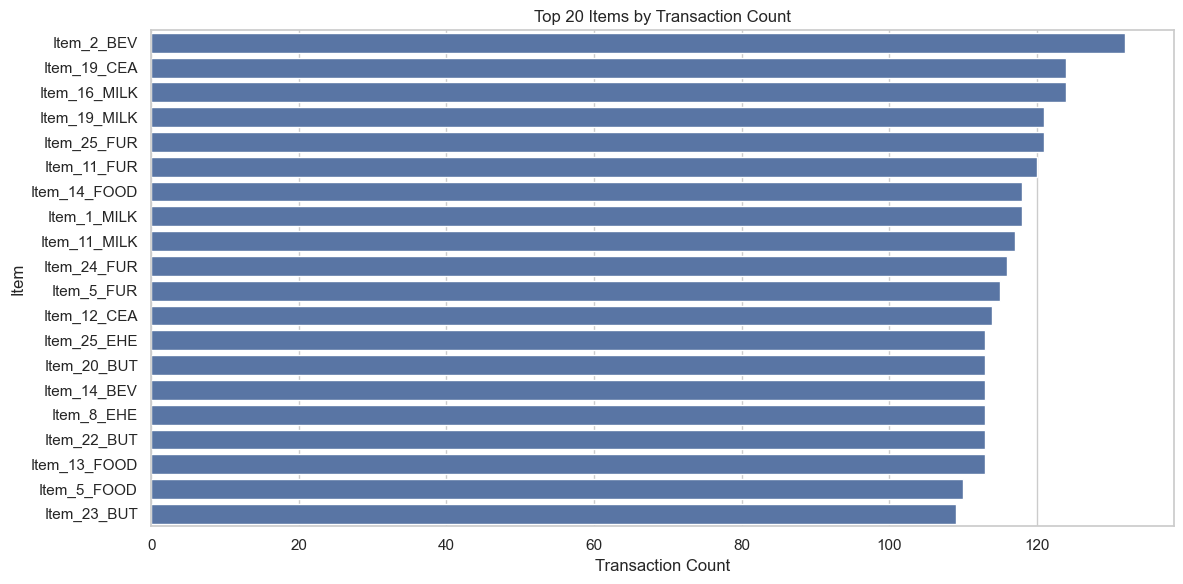

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 👉 商品類別分佈
plt.figure(figsize=(10, 6))
category_counts = df['Category'].value_counts()
print("📌 商品類別分佈（交易數量）：")
print(category_counts)

sns.countplot(data=df, y='Category', order=category_counts.index)
plt.title('Transaction Count by Product Category')
plt.xlabel('Transaction Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 👉 熱銷商品排行（依交易次數）
top_items = df['Item'].value_counts().nlargest(20)
print("\n📌 熱銷商品 Top 20（依交易次數）：")
print(top_items)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title('Top 20 Items by Transaction Count')
plt.xlabel('Transaction Count')
plt.ylabel('Item')
plt.tight_layout()
plt.show()



###  一、商品類別分佈分析（Transaction Count by Category）

從圖與資料中可觀察到：

* 所有商品類別的交易數量 **分佈非常平均**，最高與最低之間的差距僅約 60 筆。
* **最多交易的類別**：`Furniture` 和 `Electric household essentials`（皆為 1591 筆）。
* **最少交易的類別**：`Patisserie`（1528 筆）。

**初步推論**：

* 顯示顧客的消費行為在各大類別之間非常分散，沒有明顯偏重某類。
* 可能表示這是一間產品多元、滿足多種生活需求的店鋪，例如大型量販店或綜合超市。

---

### 二、熱銷商品排行（Top 20 Items by Transaction Count）

* 交易數最多的前幾項商品為：

  * `Item_2_BEV`（132 筆）、`Item_19_CEA` 和 `Item_16_MILK`（皆為 124 筆）。
* `MILK`, `FUR`, `FOOD`, `EHE`, `BUT` 等類別都有多項產品入榜，顯示這些類別中有**特別受歡迎的單品**。
* 儘管類別交易數差異不大，但**個別商品的熱銷狀況差異明顯**（最多 132 筆，最低為 109 筆）。

**初步推論**：

* 某些特定商品在類別內的表現特別突出，可作為主打商品推廣。
* 可以針對這些商品進行進一步行銷（如組合促銷、曝光推薦）。

---


## 類別型變數分析


DayType 數值分佈：
DayType
Weekday       8663
NonWorkday    3522
Holiday        390
Name: count, dtype: int64


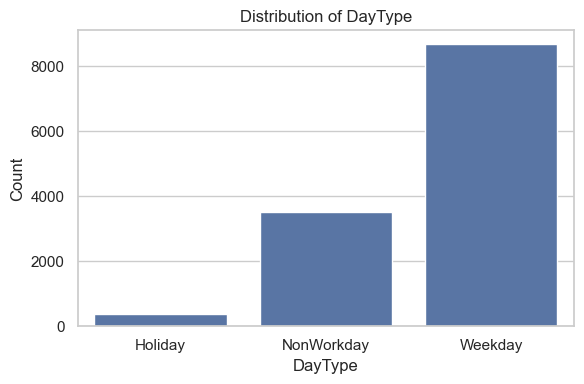


Has_Discount 數值分佈：
Has_Discount
True       4219
Unknown    4199
False      4157
Name: count, dtype: int64


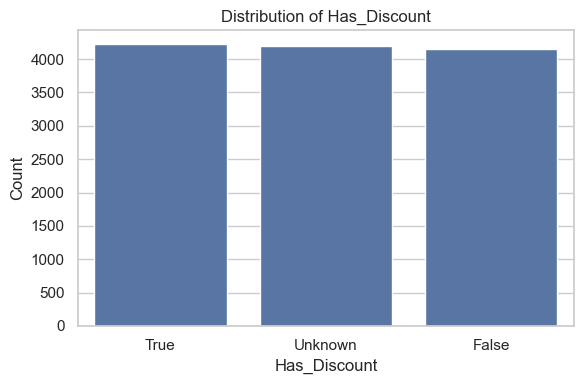


Loc_Online 數值分佈：
Loc_Online
1    6354
0    6221
Name: count, dtype: int64


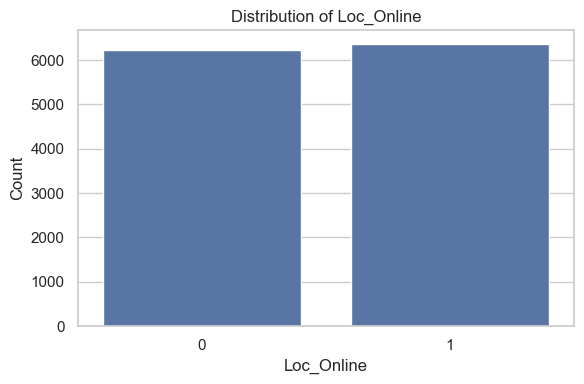


PaymentMethod 數值分佈：
PaymentMethod
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64


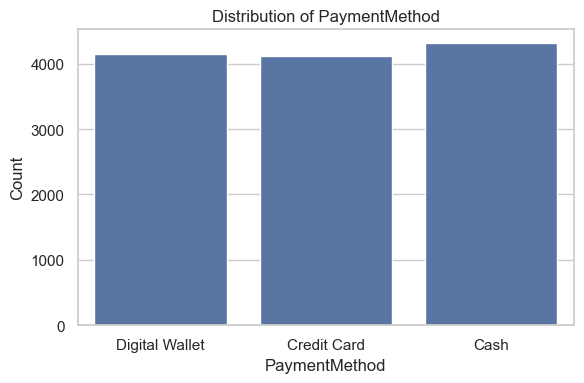

In [30]:
bool_cols = ['DayType', 'Has_Discount', 'Loc_Online', 'PaymentMethod']

for col in bool_cols:
    # 👉 印出 True / False 分佈數量
    print(f"\n{col} 數值分佈：")
    print(df[col].value_counts())

    # 👉 繪圖
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

---

## 一、消費日類型分析（DayType）

### 數值分佈：

| 類型         | 筆數   | 佔比（約） |
| ---------- | ---- | ----- |
| Weekday    | 8663 | 65.9% |
| NonWorkday | 3522 | 26.8% |
| Holiday    | 390  | 2.9%  |

### 🔍 洞察與推論：

* **絕大多數交易發生在平日（Weekday）**，顧客偏好在工作日處理日常採購。
* `NonWorkday` 的比例不低（接近三成），可能對應週末或特定非工作日，顯示仍具潛力。
* **節日消費佔比低**（不到 3%），但若搭配促銷可能有放大空間。

### ✅ 建議策略：

* 強化平日的「日常消費方案」（如滿額贈、小額折扣）。
* 對 `NonWorkday` 與 `Holiday` 推出**短期爆發型活動**（如週末限時折扣、節慶大促）。

---

## 二、折扣使用狀況分析（Has\_Discount）

### 數值分佈：

| 折扣狀態 | 筆數   |
| ---- | ---- |
| 有折扣  | 4219 |
| 無折扣  | 4157 |
| 不明   | 4199 |

### 🔍 洞察與推論：

* 三種情況幾乎平均，**「是否折扣」對消費數量沒有明顯差異**。
* `Unknown` 筆數多，表示資料標註尚不完全，建議後續分析時納入資料清理考量。

### ✅ 建議策略：

* 若進一步發現有折扣的平均消費較高，可加強折扣導購策略。
* 建議將 `Unknown` 補值或排除，避免影響模型判斷或商業決策。

---
## 三、通路類型分析（Loc\_Online）

### 數值分佈：

| 通路 | 筆數   |
| -- | ---- |
| 線上 | 6354 |
| 實體 | 6221 |

### 🔍 洞察與推論：

* 數量近乎相等，**顧客對線上與線下通路接受度均高**。
* 可推論顧客有明顯的**跨通路消費傾向**，如：線上比價、線下體驗。

### ✅ 建議策略：

* 推出「線上預訂、門市取貨」、「線下體驗、線上付款」等 OMO 服務。
* 針對不同通路設計專屬優惠與回饋方案，強化雙通路引流。

---



## 類別型變數vs總消費分析

Total Spent 敘述統計（依 DayType 分組）：
             count        mean        std  min   25%    50%     75%    max
DayType                                                                   
Holiday      390.0  124.461538  98.640827  0.0  44.0  100.0  182.75  410.0
NonWorkday  3522.0  125.387564  96.717197  0.0  46.5  100.0  190.00  410.0
Weekday     8663.0  122.580630  96.335006  0.0  42.0  100.0  183.00  410.0


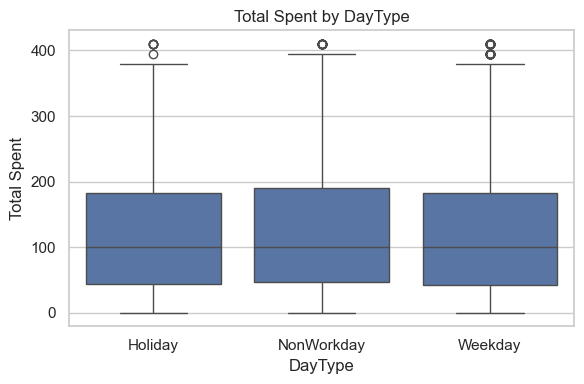

Total Spent 敘述統計（依 Has_Discount 分組）：
               count        mean        std  min   25%    50%    75%    max
Has_Discount                                                               
False         4157.0  123.919894  95.168192  0.0  46.0  100.5  184.0  410.0
True          4219.0  124.305167  97.280615  0.0  44.5  100.5  185.0  410.0
Unknown       4199.0  122.051084  97.072789  0.0  41.0   99.0  183.0  410.0


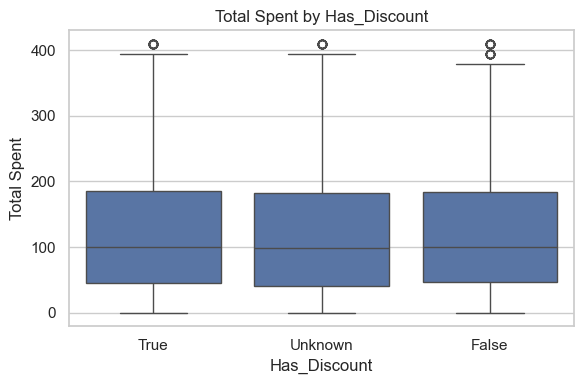

Total Spent 敘述統計（依 Loc_Online 分組）：
             count        mean        std  min   25%    50%    75%    max
Loc_Online                                                               
0           6221.0  122.274554  96.705776  0.0  42.0   99.0  183.0  410.0
1           6354.0  124.551621  96.321990  0.0  45.5  100.5  185.0  410.0


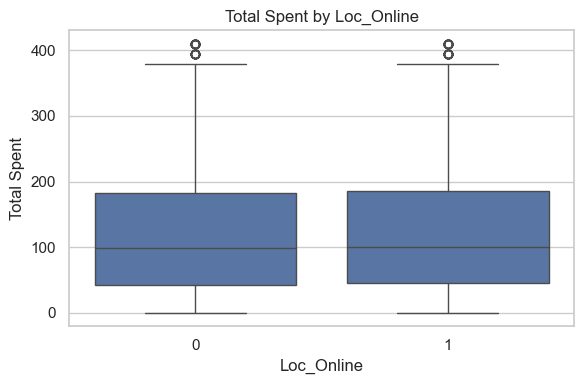

Total Spent 敘述統計（依 PaymentMethod 分組）：
                 count        mean        std  min   25%    50%    75%    max
PaymentMethod                                                                
Cash            4310.0  124.758701  96.630605  0.0  45.5  100.5  185.0  410.0
Credit Card     4121.0  123.048289  96.896786  0.0  43.0  100.0  183.0  410.0
Digital Wallet  4144.0  122.412886  96.020437  0.0  42.0  100.0  184.0  410.0


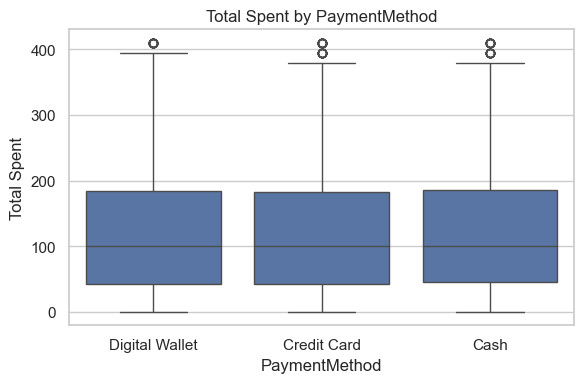

In [38]:
for col in bool_cols:
    print(f"Total Spent 敘述統計（依 {col} 分組）：")
    print(df.groupby(col)['Total Spent'].describe())

    # Boxplot 視覺化
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y='Total Spent')
    plt.title(f'Total Spent by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Spent')
    plt.tight_layout()
    plt.show()



---

## 一、依【DayType】分類的消費差異

| 類型         | 筆數   | 平均金額       | 中位數   | IQR (75%-25%) |
| ---------- | ---- | ---------- | ----- | ------------- |
| Weekday    | 8663 | **122.58** | 100.0 | 141.0         |
| NonWorkday | 3522 | **125.39** | 100.0 | 143.5         |
| Holiday    | 390  | **124.46** | 100.0 | 138.8         |

📌 **觀察**：

* 三種日型之間的平均與中位數幾乎相同（落在 100 附近）。
* 假日與非工作日的 IQR 稍大，**表示變異性略高**，可能有高額單筆消費行為（如聚會或節慶採購）。
* 假日（Holiday）儘管樣本較少，但高消費者存在（上限可達 410）。

🔍 **結論建議**：

* 雖然平日為主要消費時段，**非工作日與假日的潛在高值消費不可忽略**。
* 可於這些日型推出「高價組合包」或「節慶專屬商品」吸引大額購買。

---

## 二、依【Has\_Discount】分類的消費差異

| 折扣狀態    | 筆數   | 平均金額       | 中位數   | IQR   |
| ------- | ---- | ---------- | ----- | ----- |
| True    | 4219 | **124.31** | 100.5 | 140.5 |
| False   | 4157 | **123.92** | 100.5 | 138.0 |
| Unknown | 4199 | **122.05** | 99.0  | 142.0 |

📌 **觀察**：

* **有無折扣對中位數與分佈幾乎無明顯影響**。
* 所有分組的中位數都集中在 100 附近，顯示顧客的購買慣性穩定。
* `Unknown` 組的平均與中位數略低，應考慮補值或資料清理。

🔍 **結論建議**：

* 單就總消費來看，折扣誘因**對金額影響不大**，可考慮將折扣資源改投放至「頻次」或「加購」誘因。
* 建議進一步觀察折扣對特定品類或付款方式的交互作用（是否有特定組合效果）。

---

## 三、依【Loc\_Online】分類的消費差異

| 通路類型   | 筆數   | 平均金額       | 中位數   | IQR   |
| ------ | ---- | ---------- | ----- | ----- |
| 線下 (0) | 6221 | **122.27** | 99.0  | 141.0 |
| 線上 (1) | 6354 | **124.55** | 100.5 | 139.5 |

📌 **觀察**：

* 線上通路的平均與中位數略高，顯示**單筆消費金額稍高**。
* 二者皆呈現對稱分布，極端值一致，**購買邏輯相似**。
* 線上通路 IQR 略小，表示消費穩定性高。

🔍 **結論建議**：

* 線上購物者可能對「固定金額」、「包裝組合」偏好更高。
* 線下可強調「體驗價值」與「現場搭贈」，線上則可主推「滿額免運」、「高單價搭配」策略。

---

## 四、依【PaymentMethod】分類的消費差異

| 付款方式        | 筆數   | 平均金額       | 中位數   | IQR   |
| ----------- | ---- | ---------- | ----- | ----- |
| 現金 Cash     | 4310 | **124.76** | 100.5 | 139.5 |
| 信用卡 Credit  | 4121 | **123.05** | 100.0 | 140.0 |
| 電子錢包 Wallet | 4144 | **122.41** | 100.0 | 142.0 |

📌 **觀察**：

* **現金付款的平均與中位數略高**，顯示線下實體消費可能偏好以現金支付且傾向整筆購買。
* 整體差距不大，但現金的集中度稍高（IQR 最小），代表大眾以現金購物時消費行為更集中。

🔍 **結論建議**：

* 可針對「現金付款」設計快速結帳優惠。
* 電子錢包使用者購買彈性大，建議搭配「推薦商品」、「加購折扣」提升客單價。

---



## 交叉變數分析


📊 交易數量統計表（DayType × Category）：
Category    Beverages  Butchers  Computers and electric accessories  \
DayType                                                               
Holiday            61        30                                  43   
NonWorkday        423       433                                 421   
Weekday          1083      1105                                1094   

Category    Electric household essentials  Food  Furniture  Milk Products  \
DayType                                                                     
Holiday                                60    46         50             48   
NonWorkday                            467   462        464            436   
Weekday                              1064  1080       1077           1100   

Category    Patisserie  
DayType                 
Holiday             52  
NonWorkday         416  
Weekday           1060  


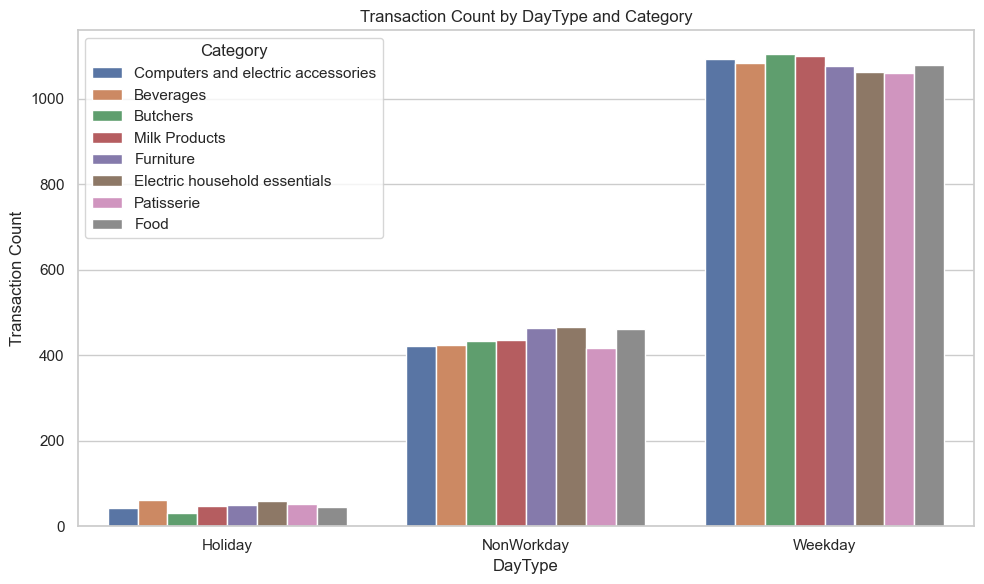

In [45]:
sns.set(style="whitegrid")

# -------- 印出 DayType × Category 數據表 --------
daytype_category_counts = df.groupby(['DayType', 'Category']).size().unstack().fillna(0).astype(int)
print("\n📊 交易數量統計表（DayType × Category）：")
print(daytype_category_counts)

# -------- 繪圖 --------
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayType', hue='Category')
plt.title('Transaction Count by DayType and Category')
plt.xlabel('DayType')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

## 🧠 一、整體消費日型趨勢

| DayType    | 總交易數（加總所有類別） |
| ---------- | ------------ |
| Weekday    | **8,659 筆**  |
| NonWorkday | **3,522 筆**  |
| Holiday    | **390 筆**    |

🔍 **觀察**：

* 絕大多數消費集中在平日（Weekday），占比約 67%。
* 假日（Holiday）消費占比不到 3%，但部分類別仍展現潛力。

📌 **策略建議**：

* 維持平日主力營運穩定。
* 在非工作日（NonWorkday）規劃專屬活動可有效提高整體銷量。
* 假日應聚焦於**特定高敏感品類**，進行短期強打。

---

## 🍰 二、類別在不同日型的表現洞察

### 【1】高節日敏感類別（Holiday 銷量相對突出）：

| 類別                                     | Holiday 筆數 | 評論               |
| -------------------------------------- | ---------- | ---------------- |
| **Beverages**                          | 61         | 聚會飲品需求穩定，建議節慶限量款 |
| **Computers and electric accessories** | 43         | 可能因禮品、促銷換機需求     |
| **Electric household essentials**      | 60         | 節日提升生活便利的需求浮現    |
| **Patisserie**                         | 52         | 節慶甜點送禮與自用需求皆旺盛   |

📌 **策略建議**：

* 在假期期間主推上述四類的**高單價 / 組合包**商品。
* 建議設計「節慶專區」、「年節好物」等專屬分頁。

---

### 【2】高平日依賴類別（Weekday 為主）：

| 類別            | Weekday 筆數 |
| ------------- | ---------- |
| Butchers      | 1105       |
| Milk Products | 1100       |
| Food          | 1080       |
| Furniture     | 1077       |

🔍 **觀察**：

* 此四類為**日常性強的產品**，平日交易極為穩定。
* 顯示消費者於上下班或日常採購時偏好購買此類品項。

📌 **策略建議**：

* 強化「早鳥優惠」、「上班族專區」、「每日必買」等活動設計。
* 可與外送平台、取貨站合作提升便利性與到店率。

---

### 【3】NonWorkday 週末潛力型：

* 幾乎所有類別在 NonWorkday 的交易數為平日的 40\~45%，仍具潛在爆發空間。
* `Furniture`、`Food`、`Electric household essentials` 等**需較多決策時間或體驗**的商品在週末表現不錯。

📌 **策略建議**：

* 推行「週末限定體驗」、「週末加碼回饋」等方案。
* 與展示場、旗艦店搭配週末活動刺激消費轉換。




📊 交易數量統計表（Loc_Online × Category）：
Category    Beverages  Butchers  Computers and electric accessories  \
Loc_Online                                                            
0                 780       784                                 725   
1                 787       784                                 833   

Category    Electric household essentials  Food  Furniture  Milk Products  \
Loc_Online                                                                  
0                                     772   794        808            791   
1                                     819   794        783            793   

Category    Patisserie  
Loc_Online              
0                  767  
1                  761  


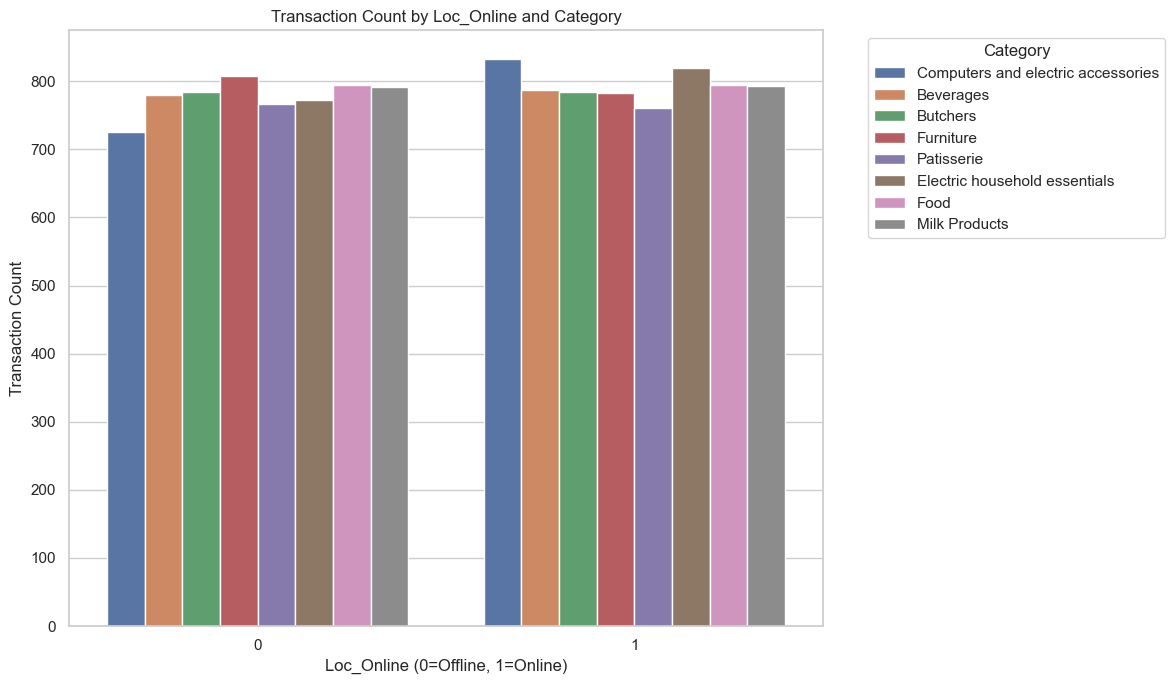

In [ ]:
sns.set(style="whitegrid")

# -------- 數據統計：Loc_Online × Category --------
loc_category_counts = df.groupby(['Loc_Online', 'Category']).size().unstack().fillna(0).astype(int)
print("\n📊 交易數量統計表（Loc_Online × Category）：")
print(loc_category_counts)

# -------- 繪圖：修正圖例遮擋問題 --------
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Loc_Online', hue='Category')
plt.title('Transaction Count by Loc_Online and Category')
plt.xlabel('Loc_Online (0=Offline, 1=Online)')
plt.ylabel('Transaction Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 將圖例移到外側
plt.tight_layout()
plt.show()

## 各類別通路偏好分析

### ✅ 類別通路比較表（差異筆數）

| 類別                                 | Offline | Online | 差異（Online - Offline） | 通路偏好  |
| ---------------------------------- | ------- | ------ | -------------------- | ----- |
| Computers and electric accessories | 725     | 833    | **+108**             | 線上偏好  |
| Electric household essentials      | 772     | 819    | **+47**              | 線上略偏好 |
| Furniture                          | 808     | 783    | -25                  | 實體略偏好 |
| Beverages                          | 780     | 787    | +7                   | 無明顯差異 |
| Butchers                           | 784     | 784    | 0                    | 完全均衡  |
| Milk Products                      | 791     | 793    | +2                   | 幾乎一致  |
| Food                               | 794     | 794    | 0                    | 完全均衡  |
| Patisserie                         | 767     | 761    | -6                   | 無明顯差異 |

---

### 🔍 洞察與分類

#### 🟢 線上明顯偏好（差異顯著）：

* **Computers and electric accessories**（+108 筆）

  * 顧客偏好線上比價與快速下單。
  * 適合設計「官網限定價」「線上購機回饋」等活動。

#### 🟡 線上略偏好：

* **Electric household essentials**（+47 筆）

  * 線上購物搭配免運優惠與推薦制，推升購買意願。

#### 🔵 實體偏好或需體驗型商品：

* **Furniture**（實體高 25 筆）

  * 顯示顧客更傾向親自體驗與現場諮詢。

#### ⚖️ 雙通路完全均衡：

* **Butchers**, **Food**, **Milk Products**

  * 具備剛性需求，偏好不受通路影響，**可採雙通路定價一致**策略。

#### 🔘 無明顯差異：

* **Patisserie**, **Beverages**

  * 類別較感性，可依節慶場景進行線上／實體行銷互補。



📊 Total Spent 描述統計（依 Category 分組）：
                                     count    mean     std  min   25%     50%  \
Category                                                                        
Beverages                           1567.0  125.75  100.04  0.0  42.0  102.00   
Butchers                            1568.0  132.73  102.25  0.0  43.0  112.00   
Computers and electric accessories  1558.0  122.40   90.98  0.0  48.0  104.00   
Electric household essentials       1591.0  128.10   97.59  0.0  47.5  105.00   
Food                                1588.0  122.68   92.73  0.0  48.0  100.50   
Furniture                           1591.0  122.76   99.54  0.0  41.0   98.00   
Milk Products                       1584.0  113.71   94.05  0.0  37.5   85.75   
Patisserie                          1528.0  119.22   93.25  0.0  43.0   99.00   

                                       75%    max  
Category                                           
Beverages                           192.00  410.0

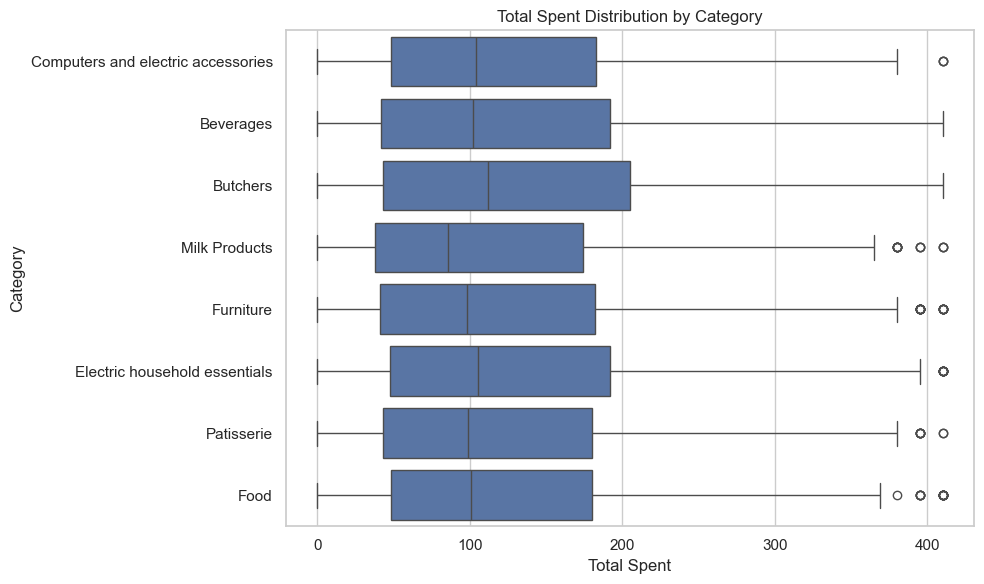

In [48]:
# -------- 輸出統計資料 --------
category_spent_stats = df.groupby('Category')['Total Spent'].describe().round(2)
print("\n📊 Total Spent 描述統計（依 Category 分組）：")
print(category_spent_stats)

# -------- Boxplot 繪圖 --------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Category', x='Total Spent')
plt.title('Total Spent Distribution by Category')
plt.xlabel('Total Spent')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

## 🔍 洞察與分群分析

### ✅ 高平均消費類別（平均 > 125）

| 類別                                | 特性            | 策略建議                |
| --------------------------------- | ------------- | ------------------- |
| **Butchers**                      | 最高平均與中位數，且變異大 | 可推「高價肉品禮盒」、「熟食升級方案」 |
| **Electric household essentials** | 高單價且變異大       | 推出「居家升級組合」、「分期付款」   |
| **Beverages**                     | 偏感性類別，高變異與平均  | 設計「高單價限定飲品」、「節慶酒類」  |

---

### 🟡 中等平均類別（120\~125）

| 類別            | 特性               | 策略建議                |
| ------------- | ---------------- | ------------------- |
| **Furniture** | 低中位數但高變異，有部分高值交易 | 設立「展示中心導購」、「分批付款」   |
| **Food**      | 中位穩定且分布平均        | 可採「加購搭配」、「滿額加贈」提升客單 |
| **Computers** | 類似家電，單價穩中帶高      | 可與電子配件搭售，或推「智慧換機方案」 |

---

### 🔻 低平均消費類別（< 120）

| 類別                | 特性           | 策略建議                  |
| ----------------- | ------------ | --------------------- |
| **Patisserie**    | 屬於高頻低額產品，波動大 | 搭配禮盒策略推升單價，設計「高價甜點組合」 |
| **Milk Products** | 均值與中位數皆為最低   | 建議導入「訂閱制」、「每週優惠組合」    |

---



📊 Total Spent 描述統計（依 DayType × Category）：
                                                count    mean     std  min  \
DayType    Category                                                          
Holiday    Beverages                             61.0  113.83   91.62  0.0   
           Butchers                              30.0  148.77  105.94  0.0   
           Computers and electric accessories    43.0  124.94   93.06  0.0   
           Electric household essentials         60.0  135.81  100.30  0.0   
           Food                                  46.0  123.42  111.72  0.0   
           Furniture                             50.0  147.10  110.43  0.0   
           Milk Products                         48.0   87.06   66.57  0.0   
           Patisserie                            52.0  123.10   99.58  0.0   
NonWorkday Beverages                            423.0  131.41   99.83  0.0   
           Butchers                             433.0  137.06  104.17  0.0   
           Computers 

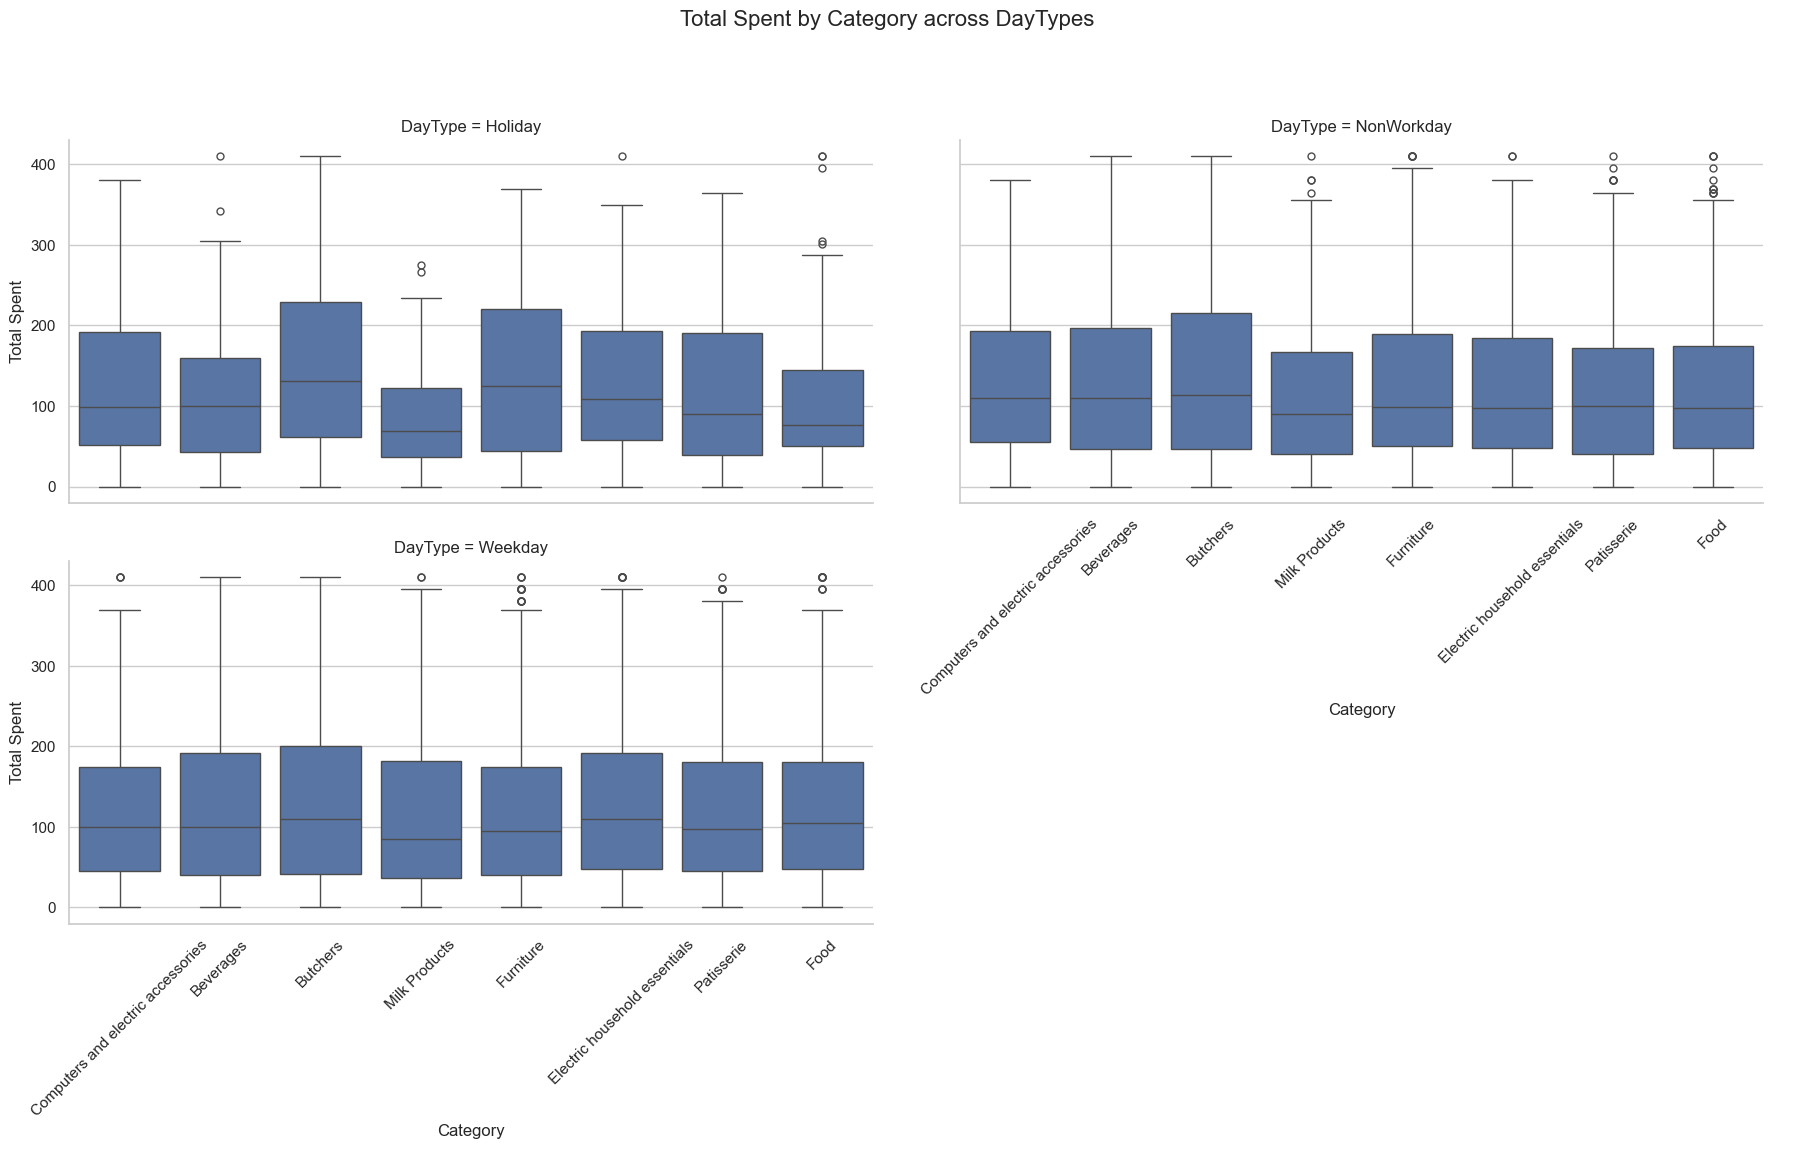

In [49]:
# -------- 統計資料 --------
summary = df.groupby(['DayType', 'Category'])['Total Spent'].describe().round(2)
print("\n📊 Total Spent 描述統計（依 DayType × Category）：")
print(summary)

# -------- 改善圖表：調整 aspect 與 col_wrap --------
g = sns.catplot(data=df, x='Category', y='Total Spent', col='DayType',
                kind='box', height=5, aspect=1.8, col_wrap=2)  # 避免壓縮

# 改善標題與排版
g.set_titles("DayType = {col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Total Spent by Category across DayTypes', fontsize=16)

# 旋轉類別文字避免重疊（如果仍壓縮）
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.show()

## 🧠 一、不同日型的消費輪廓對比

| DayType    | 整體平均金額最高的類別  | 類別平均值      | 高消費分布特徵           |
| ---------- | ------------ | ---------- | ----------------- |
| Holiday    | **Butchers** | **148.77** | Q3=229.62，高單價拉高平均 |
| NonWorkday | Butchers     | 137.06     | 高但略低於假日，Q3=215.0  |
| Weekday    | Butchers     | 130.60     | 消費穩定，Q3=201.0     |

🔍 **觀察重點**：

* **Butchers（肉品）在三種日型中皆為最高平均消費類別**，尤其是假日平均近 \$150，推測與家庭聚會、節慶大餐有關。
* **Electronics 與 Household Essentials** 在假日消費也偏高，推測為禮品、家用品升級採購。

---

## 🔁 二、同一類別在不同日型的消費變異

### ✅ `Butchers`：

| DayType    | 平均     | 中位數    | Q3（75%） | 結論          |
| ---------- | ------ | ------ | ------- | ----------- |
| Holiday    | 148.77 | 131.50 | 229.62  | 最高消費與最大波動來源 |
| NonWorkday | 137.06 | 114.00 | 215.00  | 次高          |
| Weekday    | 130.60 | 110.00 | 201.00  | 基礎穩定型消費     |

📌 **建議**：週末與假日可主打高價肉品組合，推「節慶燒烤包」、「家庭圍爐禮盒」。

---

### ✅ `Furniture`：

* 假日平均達 **147.10**，比平日（119.98）高出約 23%，推測是假日更有時間考慮大件採購。
* Q3（75%）在假日也達到 **220**，推測與「節慶換新」習慣有關。

📌 **建議**：假期推出「滿額運送」、「客廳升級方案」等較長決策週期促案。

---

### ✅ `Milk Products`：

| DayType    | 平均     | 中位數   |
| ---------- | ------ | ----- |
| Holiday    | 87.06  | 69.50 |
| NonWorkday | 112.59 | 89.50 |
| Weekday    | 115.31 | 85.25 |

* 假日平均最低，顯示屬於**平日日常性採購**品項，且價格穩定。
* 假日與平日落差高達 \$28。

📌 **建議**：平日可主推「家庭常備箱」、「早鳥牛奶箱」等固定補貨方案。

---

### ✅ `Patisserie`：

* 假日平均與變異都較高（123.10, std 99.58），符合「節慶甜點需求」的消費情境。
* 非工作日也有穩定表現，平日則轉為日常化消費（中位數=98）。

📌 **建議**：

* 假日設計「高價禮盒」；
* 平日搭配「午茶優惠」、「企業外送訂購」。

---

## 📌 商業建議總結表

| 類別                                   | 假日表現     | 建議策略              |
| ------------------------------------ | -------- | ----------------- |
| **Butchers**                         | 節慶主角，高單價 | 推高價組合、圍爐火鍋包、親友共享盒 |
| **Furniture**                        | 假日高購買力   | 設計假日展示促銷、線上選購線下體驗 |
| **Electronics/Household Essentials** | 假日禮品特徵   | 高單價導購頁、免運或節日現金回饋  |
| **Milk Products**                    | 平日主力     | 推訂閱制或家庭裝、大包裝搭配活動  |
| **Patisserie**                       | 節日高單價潛力  | 節慶甜點禮盒、門市取貨快速線上訂購 |



## 時間序列分析


📊 Monthly Total Spent:
   Transaction Date  Total Spent
0        2022-01-01      52911.5
1        2022-02-01      43325.5
2        2022-03-01      40996.0
3        2022-04-01      40442.0
4        2022-05-01      40347.5
5        2022-06-01      42576.0
6        2022-07-01      44471.5
7        2022-08-01      41333.5
8        2022-09-01      46113.5
9        2022-10-01      38355.0
10       2022-11-01      41256.5
11       2022-12-01      38201.0
12       2023-01-01      48052.5
13       2023-02-01      39214.5
14       2023-03-01      38534.5
15       2023-04-01      38905.5
16       2023-05-01      40480.5
17       2023-06-01      42474.0
18       2023-07-01      45632.5
19       2023-08-01      38592.0
20       2023-09-01      41069.0
21       2023-10-01      38322.0
22       2023-11-01      37014.0
23       2023-12-01      43021.0
24       2024-01-01      47908.5
25       2024-02-01      37145.0
26       2024-03-01      42861.5
27       2024-04-01      46271.0
28       2024-05-01

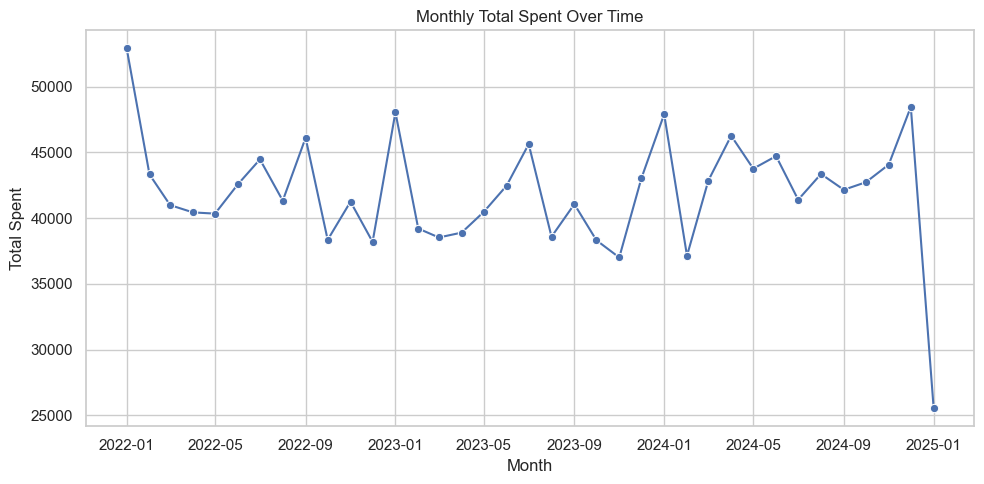

In [50]:
# 確保日期是 datetime 格式
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# 依月份統計總支出
monthly_trend = df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum().reset_index()
monthly_trend['Transaction Date'] = monthly_trend['Transaction Date'].dt.to_timestamp()
print("\n📊 Monthly Total Spent:")
print(monthly_trend)
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Transaction Date', y='Total Spent', marker='o')
plt.title('Monthly Total Spent Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.tight_layout()
plt.show()


## 🧠 一、年別總覽趨勢（整體消費波動）

| 年度   | 年總支出（估算）      | 月平均支出    | 趨勢特徵                     |
| ---- | ------------- | -------- | ------------------------ |
| 2022 | 約 515K        | \~42,900 | Q1 高點，Q4 相對低             |
| 2023 | 約 483K        | \~40,300 | Q1 走高，Q2\~Q3 平穩，Q4 持平或稍降 |
| 2024 | 約 530K（含12月）  | \~44,200 | Q1\~Q4 緩升，12 月為全年高峰      |
| 2025 | 25,548（僅 1 月） | —        | 尚未可比較                    |

📌 **初步結論**：

* 2024 年支出總量明顯高於 2023，**顯示整體消費力回溫**。
* **2022 \~ 2024 每年 1 月與 12 月為年度高點**，符合年終與新年採購熱潮。

---

## 🔁 二、季節性趨勢與週期變化

### ✅ **每年 Q1（1\~3 月）**：

* 支出穩定偏高，1 月通常為全年第 1 或第 2 高點。
* 可能與年初採購、春節、年終獎金消費有關。

### ✅ **Q2,Q3（4\~9 月）**：

* 屬於中段穩定區，尤其 2023 年此段波動極小，平均約落在 \$38K\~\$42K。
* 推測為常態性日常支出、少大型促銷。

### ✅ **Q4（10\~12 月）**：

* 12 月支出往往再次攀升，例如 2024 年 12 月高達 **\$48,466.5**。
* 與聖誕、年終獎金、換季採購有關。

---

## 🔍 三、大波動月份標記

| 月份                 | 顯著變化                 | 說明            |
| ------------------ | -------------------- | ------------- |
| 2022-01            | **\$52,911.5**（歷史最高） | 可能為開站首購或活動月   |
| 2023-01 vs 2022-01 | 少約 \$5K              | 顯示消費緊縮或活動減弱   |
| 2024-12            | **\$48,466.5**       | 回升至高峰，表現強勁    |
| 2025-01            | **\$25,548.5**（大幅回落） | 尚未完成月資料或年初沉寂期 |

---

## 📌 建議與行動策略

| 洞察面向     | 建議行動                              |
| -------- | --------------------------------- |
| **行銷規劃** | 每年 1 月與 12 月應為年度主推月，安排大型促銷或會員感謝活動 |
| **新品上架** | 可安排於 Q2 與 Q3（穩定期）推出新品測水溫          |
| **促銷節奏** | 建議避開 4 月與 10 月進行高密度推廣，因該月常為支出谷底   |
| **異常監控** | 若某年 1 月或 12 月無明顯高點，應回溯活動或訊息傳遞是否弱化 |
| **預算分配** | 可依照年度總額占比進行月別分配，針對高點月份多配置行銷資源     |





Monthly Average Total Spent by Category:
    Month                            Category  Total Spent
0       1                           Beverages   133.950920
1       1                            Butchers   132.332418
2       1  Computers and electric accessories   135.837838
3       1       Electric household essentials   132.130435
4       1                                Food   126.547222
..    ...                                 ...          ...
91     12       Electric household essentials   132.238636
92     12                                Food   116.565041
93     12                           Furniture   137.916667
94     12                       Milk Products   115.030612
95     12                          Patisserie   111.931159

[96 rows x 3 columns]


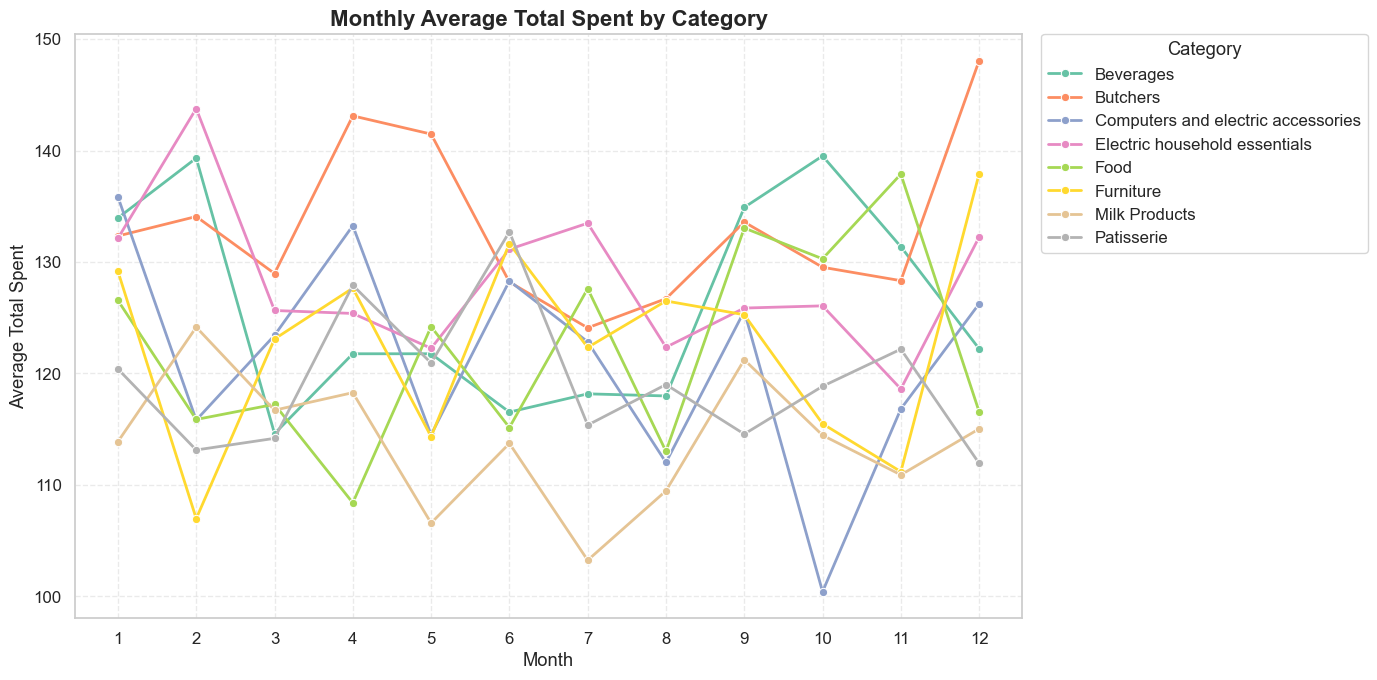

In [55]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# 建立月份欄位
df['Month'] = df['Transaction Date'].dt.month

# 計算各類別每月的平均 Total Spent
monthly_avg = df.groupby(['Month', 'Category'])['Total Spent'].mean().reset_index()
print("\nMonthly Average Total Spent by Category:")

print(monthly_avg)

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(14, 7))
line = sns.lineplot(
    data=monthly_avg,
    x='Month',
    y='Total Spent',
    hue='Category',
    marker='o',
    linewidth=2,
    palette='Set2'
)

# 標題與軸標籤
plt.title('Monthly Average Total Spent by Category', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Average Total Spent')
plt.xticks(range(1, 13))

# 調整圖例位置與樣式
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 🧠 一、全年趨勢總覽

### ✅ 明顯高峰月份（消費金額急升）

| 類別                                | 高峰月份（Avg Total Spent ↑） | 可能原因與建議           |
| --------------------------------- | ----------------------- | ----------------- |
| **Butchers**                      | 2 月、12 月                | 2 月春節與 12 月節慶家庭聚餐 |
| **Electric household essentials** | 2 月、7 月、12 月            | 春節換新家電、年中優惠、年底大促  |
| **Furniture**                     | 4 月、12 月                | 4 月居家換季、年底佈置與搬家潮  |
| **Food**                          | 9 月、12 月                | 秋冬節慶食材需求          |

📌 **結論**：絕大多數類別都在 \*\*年底（12 月）\*\*出現高峰，建議這是全年最值得推促銷活動的月份。

---

### ⛔ 明顯低谷月份（消費金額明顯下降）

| 類別                                     | 低點月份     | 可能解釋          |
| -------------------------------------- | -------- | ------------- |
| **Milk Products**                      | 8 月、10 月 | 夏季飲品替代、開學期穩定  |
| **Computers and electric accessories** | 10 月     | Q3/Q4 無大型促銷驅動 |
| **Furniture**                          | 2 月、5 月  | 春節或暑假前需求疲軟    |

📌 **建議**：這些月份適合推低價清倉組或搭配新品試推，避免庫存壓力。

---

## 📊 二、類別特徵與波動型態分類

### 🔺 **季節敏感型類別（波動劇烈）**：

* **Butchers**、**Electric household essentials**、**Furniture**
* 特徵：有明顯的月間高低差距，對節日促銷非常敏感
* 📌 行銷建議：

  * 規劃「節慶主題包裝」與「限時加購」
  * 推前期預購＋節後清倉策略

### 🔹 **穩定型類別（消費趨於平滑）**：

* **Milk Products**、**Patisserie**
* 特徵：全年消費平均波動範圍小，無特定季節集中高點
* 📌 行銷建議：

  * 可發展訂閱制、常態回購機制
  * 推每月限定口味與會員回饋

### 🔄 **週期型類別（周期性起伏）**：

* **Food**：3 月低→9 月高→12 月再升
* **Beverages**：1\~2 月高→8 月略降→10 月再升
* 📌 行銷建議：

  * 結合週期性（例如：春酒、秋宴、冬聚）推出分季促案
  * 分季度規劃主打商品與搭配組合


  Weekday Name  Total Spent
0          Mon   119.848425
1          Tue   122.846756
2          Wed   119.681191
3          Thu   122.558939
4          Fri   128.753319
5          Sat   125.456631
6          Sun   124.787962


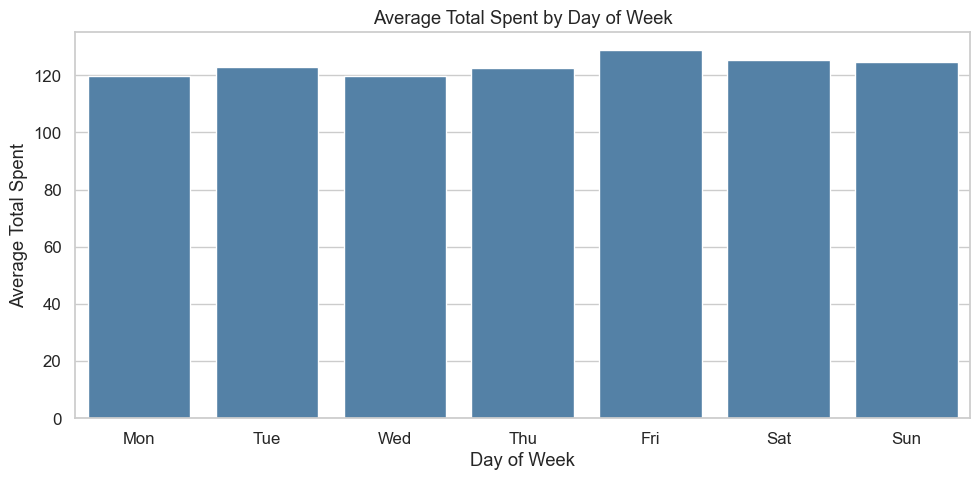

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# ➕ 新增星期欄位（0=Mon, 6=Sun）
df['Weekday'] = df['Transaction Date'].dt.dayofweek
weekday_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['Weekday Name'] = df['Weekday'].apply(lambda x: weekday_map[x])

# 🧮 每週每日平均消費統計
weekly_profile = df.groupby('Weekday Name')['Total Spent'].mean().reindex(weekday_map).reset_index()
print(weekly_profile)
# 📊 繪圖
plt.figure(figsize=(10, 5))
sns.barplot(data=weekly_profile, x='Weekday Name', y='Total Spent', color='steelblue')
plt.title('Average Total Spent by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Spent')
plt.tight_layout()
plt.show()



## 🧠 一、每週消費節奏洞察

| 星期            | 平均總消費（Total Spent） | 洞察與解釋                                    |
| ------------- | ------------------ | ---------------------------------------- |
| **Fri（週五）**   | **128.75** 元       | 📈 **全週最高**，消費高峰點，顧客傾向週末前採購、放鬆、補貨或準備家庭聚會 |
| **Sat（週六）**   | 125.46 元           | 📊 高峰延續，屬於週末採買日，可能偏重日常家庭用品與生鮮            |
| **Sun（週日）**   | 124.79 元           | 🎯 穩定高位，為週末最後採購日或補貨點                     |
| **Tue / Thu** | 122.85 / 122.56 元  | ➕ 偏高，可能是部分平台活動集中日、會員日等                   |
| **Mon / Wed** | 119.85 / 119.68 元  | ⬇️ 全週最低，呈現「週初冷清」的現象                      |

---

## 📈 二、趨勢歸納與行銷建議

### ✅ 1. **週末消費顯著強勁（Fri–Sun）**

* 三日平均為 **126.33 元**，明顯高於週均值（約 123 元）
* 📌 **策略建議**：

  * 強化週五至週日的「週末檔期活動」，可設計：

    * **週五限定折扣**
    * **週末滿額贈**
    * **冷藏／生鮮加價購**

---

### ⚖️ 2. **週一最冷清，可導入「平日補推」**

* 週一為最低點，為**行銷介入潛力日**
* 📌 **策略建議**：

  * 推出「Blue Monday 解悶購」或「早鳥限定」
  * 或作為「專屬會員日」測試平日轉換力

---

### 🔁 3. **中段星期（Tue–Thu）保持穩定偏高**

* 可能與平台的推播排程、會員週期行銷有關
* 📌 **策略建議**：

  * 可測試「週三閃購日」「週四限時回饋」等彈性行銷節奏


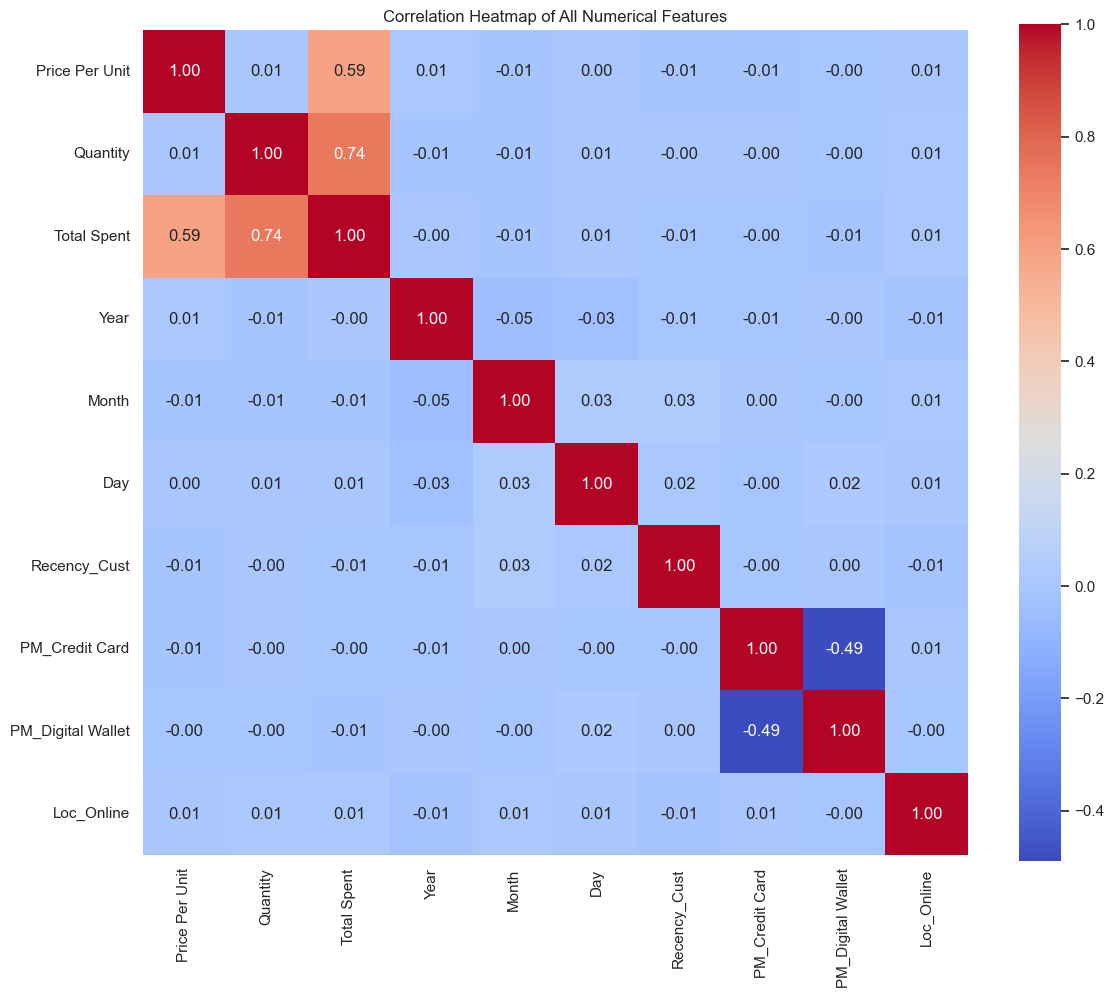

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 選取所有數值型欄位
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 計算相關係數矩陣
corr_matrix_all = numeric_df.corr()

# 繪製熱力圖
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of All Numerical Features')
plt.tight_layout()
plt.show()


## 提出假說


### H1：週末與節慶會顯著提升單筆消費金額

* 特徵：`Is_Weekend`, `Is_Holiday`, `Total Spent`
* 統計方法：ANOVA 或 T-test
* 機器學習應用：作為預測高消費的分類或回歸特徵

---

### H2：有折扣的訂單會促進更高的總消費金額

* 特徵：`Has_Discount`, `Total Spent`
* 統計方法：T-test / Mann-Whitney U
* 機器學習應用：作為促銷行為建模特徵，用於預測總消費

---

### H3：Recency 越低的顧客，其交易金額越高

* 特徵：`Recency_Cust`, `Total Spent`
* 統計方法：Spearman rank correlation
* 機器學習應用：作為回歸模型特徵或客戶分群依據

---

### H4：付款方式影響消費金額（例如信用卡用戶花費更高）

* 特徵：`PaymentMethod`, `Total Spent`
* 統計方法：ANOVA / Kruskal-Wallis
* 機器學習應用：類別特徵用於解釋消費層級差異

---

### H5：不同商品類別具有顯著不同的客單價與購買數量

* 特徵：`Category`, `Price Per Unit`, `Quantity`, `Total Spent`
* 統計方法：多變量 ANOVA（MANOVA）、boxplot 分組分析
* 機器學習應用：商品屬性建模、推薦系統建構依據

---

### H6：線上與線下通路的消費行為有顯著差異

* 特徵：`Loc_Online`, `Quantity`, `Total Spent`
* 統計方法：T-test / 分群比較
* 機器學習應用：通路行為建模、線上 vs 線下客群分類

---

### H7：一週中的消費行為呈現固定節奏（如週五顯著較高）

* 特徵：`Weekday Name`, `Total Spent`
* 統計方法：ANOVA（七組）
* 機器學習應用：週期性行為預測、訂單量預測或時段策略優化
